In [1]:
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
%matplotlib inline

#データフレームを作成
df1 = pd.read_csv('school_data_jun.csv', thousands = ',')
df2 = pd.read_csv('teacher_data_jun.csv', thousands = ',')
df3 = df1.merge(df2, how = 'left', on = 'year')
df4 = df3.drop(['stu_per_tch_jun', 'rate_Lve_jun', 'sdt_total_jun','futoko_jun', 'tch_total_jun_x','pass_jun', 'OII_jun','Lve_total_jun','tch_total_jun_y'], axis = 1)
df4.head()

,year,futoko_rate_jun,ijime_per_thou_jun,classes_jun,exm_jun,rate_jun,rate_OII_jun
0,1991,1.04,2.4,3150,41496,4.2,0.004
1,1992,1.16,2.9,3150,39005,5.0,0.004
2,1993,1.24,2.8,3150,39279,6.0,0.006
3,1994,1.32,6.1,3150,42376,8.0,0.004
4,1995,1.42,6.8,3150,47486,8.8,0.004


In [2]:
#欠損値の確認
df4.isnull().sum()

year                  0
futoko_rate_jun       0
ijime_per_thou_jun    0
classes_jun           0
exm_jun               0
rate_jun              0
rate_OII_jun          0
dtype: int64

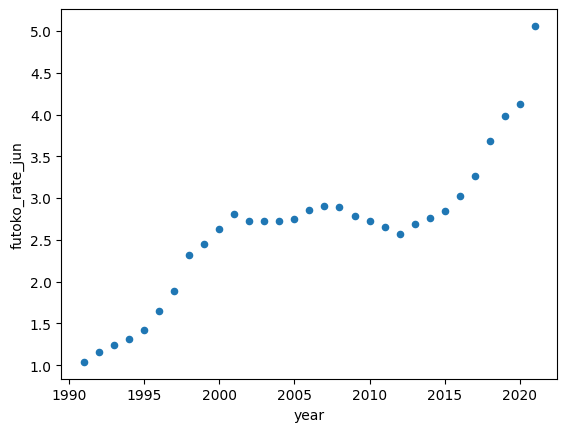

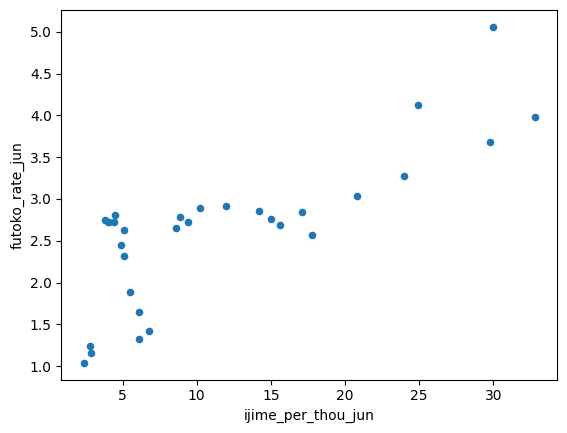

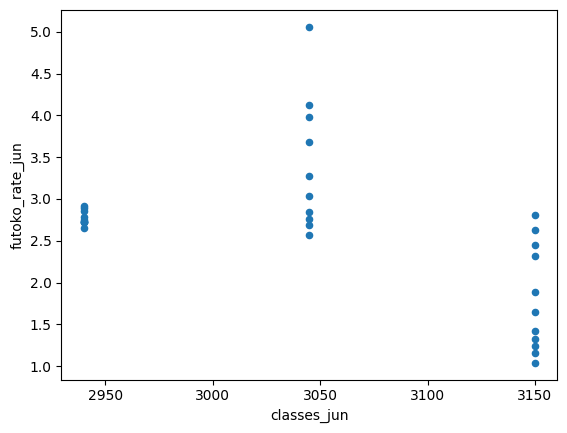

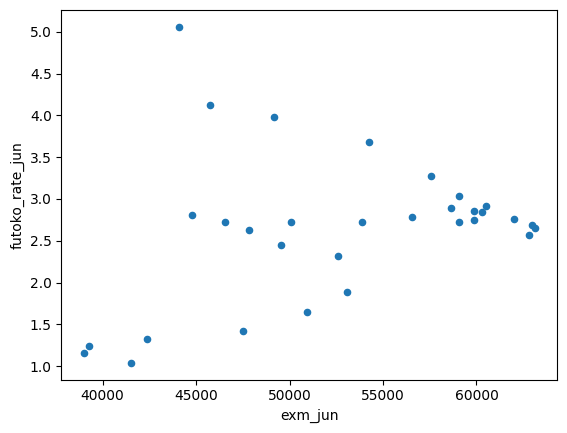

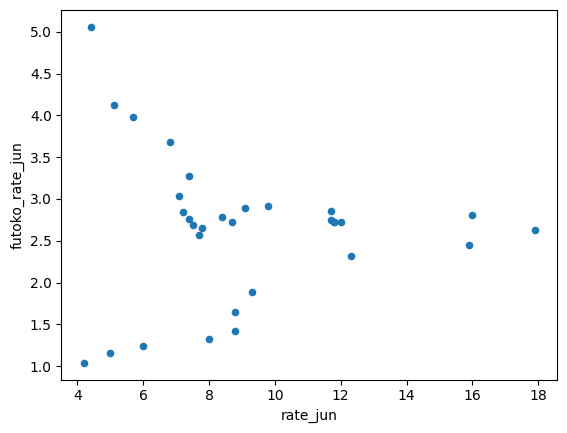

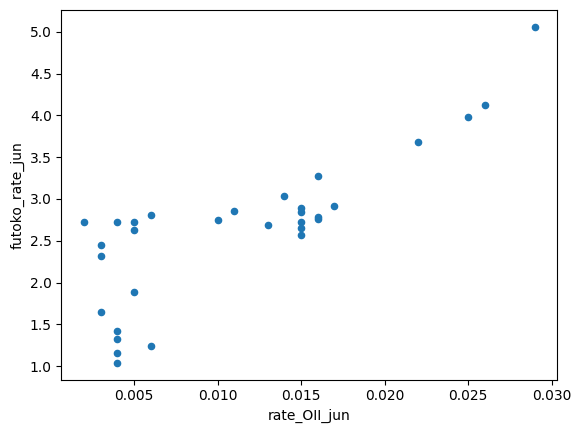

In [3]:
#分布図で相関を見る
for i in df4.columns:
    if i == 'futoko_rate_jun':
        continue
    df4.plot(kind = 'scatter', x = i, y = 'futoko_rate_jun')

In [4]:
#標準化する
sc = StandardScaler()
sc.fit(df4)
sc_df4 = sc.transform(df4)
sc_df5 = pd.DataFrame(sc_df4, columns = df4.columns)
sc_df5.head()

,year,futoko_rate_jun,ijime_per_thou_jun,classes_jun,exm_jun,rate_jun,rate_OII_jun
0,-1.677051,-1.833918,-1.040019,1.176697,-1.521554,-1.459897,-0.962980
1,-1.565248,-1.695985,-0.983496,1.176697,-1.858977,-1.220285,-0.962980
2,-1.453444,-1.604029,-0.994801,1.176697,-1.821862,-0.920769,-0.696441
3,-1.341641,-1.512074,-0.621750,1.176697,-1.402351,-0.321738,-0.962980
4,-1.229837,-1.397130,-0.542618,1.176697,-0.710166,-0.082125,-0.962980


In [12]:
#多項式特徴量、交互作用特徴量を出してみる
df5 = sc_df5.loc[:, 'ijime_per_thou_jun':]
poly = PolynomialFeatures(degree = 2)
df6 = poly.fit_transform(df5)
poly.get_feature_names_out()

array(['1', 'ijime_per_thou_jun', 'classes_jun', 'exm_jun', 'rate_jun',
       'rate_OII_jun', 'ijime_per_thou_jun^2',
       'ijime_per_thou_jun classes_jun', 'ijime_per_thou_jun exm_jun',
       'ijime_per_thou_jun rate_jun', 'ijime_per_thou_jun rate_OII_jun',
       'classes_jun^2', 'classes_jun exm_jun', 'classes_jun rate_jun',
       'classes_jun rate_OII_jun', 'exm_jun^2', 'exm_jun rate_jun',
       'exm_jun rate_OII_jun', 'rate_jun^2', 'rate_jun rate_OII_jun',
       'rate_OII_jun^2'], dtype=object)

In [13]:
#先ほど出した多項式特徴量、交互作用特徴量をデータフレームにする
df7 = pd.DataFrame(df6, columns = ['1', 'ijime_per_thou_jun', 'classes_jun', 'exm_jun', 'rate_jun',
       'rate_OII_jun', 'ijime_per_thou_jun^2',
       'ijime_per_thou_jun classes_jun', 'ijime_per_thou_jun exm_jun',
       'ijime_per_thou_jun rate_jun', 'ijime_per_thou_jun rate_OII_jun',
       'classes_jun^2', 'classes_jun exm_jun', 'classes_jun rate_jun',
       'classes_jun rate_OII_jun', 'exm_jun^2', 'exm_jun rate_jun',
       'exm_jun rate_OII_jun', 'rate_jun^2', 'rate_jun rate_OII_jun',
       'rate_OII_jun^2'])
df7.head()


,1,ijime_per_thou_jun,classes_jun,exm_jun,rate_jun,rate_OII_jun,ijime_per_thou_jun^2,ijime_per_thou_jun classes_jun,ijime_per_thou_jun exm_jun,ijime_per_thou_jun rate_jun,...,classes_jun^2,classes_jun exm_jun,classes_jun rate_jun,classes_jun rate_OII_jun,exm_jun^2,exm_jun rate_jun,exm_jun rate_OII_jun,rate_jun^2,rate_jun rate_OII_jun,rate_OII_jun^2
0,1.0,-1.040019,1.176697,-1.521554,-1.459897,-0.962980,1.081639,-1.223787,1.582444,1.518321,...,1.384615,-1.790407,-1.717856,-1.133136,2.315125,2.221312,1.465226,2.131300,1.405852,0.927331
1,1.0,-0.983496,1.176697,-1.858977,-1.220285,-0.962980,0.967264,-1.157277,1.828296,1.200145,...,1.384615,-2.187452,-1.435905,-1.133136,3.455795,2.268481,1.790158,1.489095,1.175110,0.927331
2,1.0,-0.994801,1.176697,-1.821862,-0.920769,-0.696441,0.989628,-1.170579,1.812389,0.915982,...,1.384615,-2.143779,-1.083466,-0.819500,3.319180,1.677514,1.268819,0.847816,0.641261,0.485030
3,1.0,-0.621750,1.176697,-1.402351,-0.321738,-0.962980,0.386574,-0.731612,0.871912,0.200041,...,1.384615,-1.650142,-0.378588,-1.133136,1.966589,0.451189,1.350436,0.103515,0.309827,0.927331
4,1.0,-0.542618,1.176697,-0.710166,-0.082125,-0.962980,0.294435,-0.638497,0.385349,0.044563,...,1.384615,-0.835650,-0.096637,-1.133136,0.504336,0.058323,0.683876,0.006745,0.079085,0.927331


In [14]:
#’futoko_rate_jun’を戻して'1'を削除
df7['futoko_rate_jun'] = sc_df5['futoko_rate_jun']
df8 = df7.drop(['1'], axis = 1)
df8.head()

,ijime_per_thou_jun,classes_jun,exm_jun,rate_jun,rate_OII_jun,ijime_per_thou_jun^2,ijime_per_thou_jun classes_jun,ijime_per_thou_jun exm_jun,ijime_per_thou_jun rate_jun,ijime_per_thou_jun rate_OII_jun,...,classes_jun exm_jun,classes_jun rate_jun,classes_jun rate_OII_jun,exm_jun^2,exm_jun rate_jun,exm_jun rate_OII_jun,rate_jun^2,rate_jun rate_OII_jun,rate_OII_jun^2,futoko_rate_jun
0,-1.040019,1.176697,-1.521554,-1.459897,-0.962980,1.081639,-1.223787,1.582444,1.518321,1.001517,...,-1.790407,-1.717856,-1.133136,2.315125,2.221312,1.465226,2.131300,1.405852,0.927331,-1.833918
1,-0.983496,1.176697,-1.858977,-1.220285,-0.962980,0.967264,-1.157277,1.828296,1.200145,0.947087,...,-2.187452,-1.435905,-1.133136,3.455795,2.268481,1.790158,1.489095,1.175110,0.927331,-1.695985
2,-0.994801,1.176697,-1.821862,-0.920769,-0.696441,0.989628,-1.170579,1.812389,0.915982,0.692820,...,-2.143779,-1.083466,-0.819500,3.319180,1.677514,1.268819,0.847816,0.641261,0.485030,-1.604029
3,-0.621750,1.176697,-1.402351,-0.321738,-0.962980,0.386574,-0.731612,0.871912,0.200041,0.598733,...,-1.650142,-0.378588,-1.133136,1.966589,0.451189,1.350436,0.103515,0.309827,0.927331,-1.512074
4,-0.542618,1.176697,-0.710166,-0.082125,-0.962980,0.294435,-0.638497,0.385349,0.044563,0.522531,...,-0.835650,-0.096637,-1.133136,0.504336,0.058323,0.683876,0.006745,0.079085,0.927331,-1.397130


In [29]:
pd.options.display.max_rows = 100

In [15]:
#相関係数を出してみる
abs(df8.corr()['futoko_rate_jun']).sort_values(ascending=False)
#print(abs(df8.corr()['futoko_rate_jun']).sort_values(ascending=False).to_numpy())
#print('\n'.join([f'{x,y}' for x,y in zip(abs(df8.corr()['futoko_rate_jun']).sort_values(ascending=False).index, abs(df8.corr()['futoko_rate_jun']).sort_values(ascending=False).to_numpy())]))




futoko_rate_jun                    1.000000
rate_OII_jun                       0.817131
exm_jun rate_OII_jun               0.804466
ijime_per_thou_jun rate_jun        0.801148
ijime_per_thou_jun                 0.781636
rate_jun rate_OII_jun              0.750320
ijime_per_thou_jun exm_jun         0.734558
ijime_per_thou_jun^2               0.599235
ijime_per_thou_jun rate_OII_jun    0.594996
rate_OII_jun^2                     0.584084
classes_jun^2                      0.551789
classes_jun exm_jun                0.536355
ijime_per_thou_jun classes_jun     0.475259
classes_jun                        0.471835
classes_jun rate_OII_jun           0.470770
exm_jun^2                          0.389212
exm_jun                            0.291825
classes_jun rate_jun               0.220245
exm_jun rate_jun                   0.165099
rate_jun                           0.067452
rate_jun^2                         0.054991
Name: futoko_rate_jun, dtype: float64

In [20]:
#特徴量と正解データに分割
col = ['rate_OII_jun', 'ijime_per_thou_jun', 'classes_jun^2']
x = df8[col]
t = df8['futoko_rate_jun']

In [21]:
#訓練データとテストデータの分割
x_train, x_test, y_train, y_test = train_test_split(x,t, test_size = 0.2, random_state = 0)

#モデルを作成し学習させる
model = LinearRegression()
model.fit(x_train,y_train) 

LinearRegression()

In [22]:
model.score(x_test, y_test)

0.6449198007950896